In [1]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:


# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()


In [3]:

## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

## 정답을 바이너리화 함.
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


In [4]:

# CNN 모델 설계.
## 모델
input_Layer = tf.keras.layers.Input(shape=(28,28,1))
x=tf.keras.layers.Conv2D(32,(3,3), strides=1, activation='relu', padding='same')(input_Layer)
x=tf.keras.layers.MaxPool2D((2,2))(x)
x=tf.keras.layers.Conv2D(64,(3,3),strides=1,activation='relu')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)
x=tf.keras.layers.Flatten()(x)
x= tf.keras.layers.Dense(512, activation='relu')(x)
Out_Layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               118016

In [5]:

loss_function=tf.keras.losses.categorical_crossentropy
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# 모델 최적화 설정
MODEL_DIR = './CNN_MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

with tf.device('/cpu:0'):
    # 모델의 실행
    result = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=2000, verbose=1, callbacks=callback_list)


Epoch 1/10
24/24 [==============================] - 19s 765ms/step - loss: 6.2105 - categorical_accuracy: 0.5670 - val_loss: 1.3007 - val_categorical_accuracy: 0.8017

Epoch 00001: val_loss improved from inf to 1.30073, saving model to ./CNN_MNIST_model/01-1.3007.hdf5
Epoch 2/10
24/24 [==============================] - 21s 866ms/step - loss: 1.1846 - categorical_accuracy: 0.8248 - val_loss: 0.9277 - val_categorical_accuracy: 0.8568

Epoch 00002: val_loss improved from 1.30073 to 0.92771, saving model to ./CNN_MNIST_model/02-0.9277.hdf5
Epoch 3/10
24/24 [==============================] - 20s 850ms/step - loss: 0.8995 - categorical_accuracy: 0.8763 - val_loss: 0.3984 - val_categorical_accuracy: 0.9295

Epoch 00003: val_loss improved from 0.92771 to 0.39836, saving model to ./CNN_MNIST_model/03-0.3984.hdf5
Epoch 4/10
24/24 [==============================] - 20s 850ms/step - loss: 0.5418 - categorical_accuracy: 0.9198 - val_loss: 0.4909 - val_categorical_accuracy: 0.9133

Epoch 00004: val_

In [6]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 4ms/step - loss: 0.4368 - categorical_accuracy: 0.9275

 Test Accuracy: 0.9275


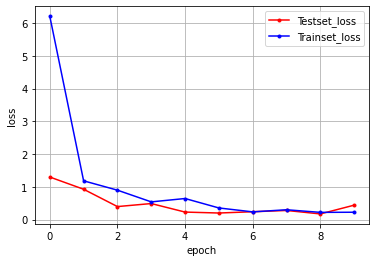

In [7]:
# 테스트 셋의 오차
y_vloss = result.history['val_loss']

# 학습셋의 오차
y_loss = result.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
(x, y), (xt, yt) = tf.keras.datasets.mnist.load_data()
print(x.shape)
print(type(x.shape))
print(x.reshape(-1, 28, 28, 1)[0])
print(x[0])

(60000, 28, 28)
<class 'tuple'>
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
